# (SLR+SLC+USL) PROJECT

# STEP 1 : UNDERSTAND THE PROBLEM STATEMENT


We understand that the task is to develop an intelligent system for a global finance company that automatically categorizes customers into credit score brackets based on their basic bank details and credit-related information, reducing the need for manual efforts in the process.

# STEP 2: Import all the libraries and set up all the requirements that you will be needed(optional). 

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=False
pd.options.display.max_rows=False

# STEP 3. Read the train and test data sets, and check for the datatypes.

In [2]:
train_df=pd.read_csv("train.csv")
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test_df=pd.read_csv("test.csv")
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [3]:
train_df ['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [11]:
train_df.shape #including target columns 

(100000, 28)

In [7]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
test_df.shape # not include the target column

(50000, 27)

In [8]:
test_df.columns 

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

# Check datatypes

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

We imported all the training and test dataset . We checked the datatypes of all the columns

# STEP 4: Fix the problem that the features have been wrongly identified.

In [12]:
train_df['Age']=train_df['Age'].str.replace('_','')

In [13]:
train_df['Age'].unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [14]:
train_df['Age']=train_df['Age'].astype(int)

In [15]:
train_df['Annual_Income']=train_df['Annual_Income'].str.replace('_','')

In [16]:
train_df['Annual_Income']=train_df['Annual_Income'].astype(float)

In [17]:
train_df['Num_of_Loan']=train_df['Num_of_Loan'].str.replace('_','')

In [18]:
train_df['Num_of_Loan']=train_df['Num_of_Loan'].astype(int)

In [19]:
train_df['Monthly_Balance']=train_df['Monthly_Balance'].str.replace('_','')

In [20]:
train_df['Monthly_Balance']=train_df['Monthly_Balance'].astype(float)

In [21]:
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].str.replace('_','')

In [22]:
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].astype(float)

In [23]:
train_df['Outstanding_Debt']=train_df['Outstanding_Debt'].str.replace('_','')

In [24]:
train_df['Outstanding_Debt']=train_df['Outstanding_Debt'].astype(float)

In [25]:
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].str.replace('_','0.0')

In [26]:
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].astype(float)

In [28]:
#train_df['Credit_History_Age']=train_df['Credit_History_Age'].astype(float)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [30]:
numerical_colns = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_colns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

We found few of the columns are not of correct datatype.We identified and converted them to correct datatype uding data definition given in the problem statement.

# STEP 4.1: Clean the anomalies in the categorical variables.

In [31]:
train_cat=train_df.select_dtypes('object')

In [32]:
train_cat.head()

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,NaN,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good


In [33]:
train_cat.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [34]:
train_df['SSN'].value_counts() #To check the mode value of SSN

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
376-28-6303       8
194-93-5515       8
442-30-8588       8
362-78-8068       8
221-76-9774       8
307-67-5773       8
712-45-6575       8
236-43-2661       8
005-71-5332       8
418-89-9094       8
               ... 
616-90-1633       5
664-33-5906       5
771-10-8942       5
695-70-3700       5
809-40-8569       5
717-08-7114       5
985-02-9495       5
777-87-7270       5
838-33-4811       4
642-73-7670       4
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [35]:
train_df['SSN']=train_df['SSN'].replace('#F%$D@*&8','078-73-5990')

In [37]:
train_df['Occupation'].value_counts()#To check the mode value of Occupation

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [38]:
train_df['Occupation']=train_df['Occupation'].replace('_______','Lawyer')

In [39]:
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].str.replace('_','')

In [40]:
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].fillna(train_df['Num_of_Delayed_Payment'].median()).replace(True)

In [41]:
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].astype(float)

In [42]:
train_df['Credit_Mix']=train_df['Credit_Mix'].replace('_','Standard')

In [43]:
train_df['Payment_Behaviour']=train_df['Payment_Behaviour'].replace('!@9#%8','Low_spent_Small_value_payments')

We found few anomalies in the categorical columns . We identified them and replaced with mode value.

# STEP 4.2: Clean the anomalies for numerical variables.

In [44]:
train_df.select_dtypes(include=np.number).columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [45]:
age_med=train_df['Age'].median()

In [46]:
train_df['Age']=train_df['Age'].apply(lambda x: age_med if x < 0 or x >85 else x)

In [47]:
num_bank_med=train_df['Num_Bank_Accounts'].median()

In [48]:
train_df['Num_Bank_Accounts']=train_df['Num_Bank_Accounts'].apply(lambda x: num_bank_med if x < 0  else x)


In [49]:
Num_Loan_med=train_df['Num_of_Loan'].median()

In [50]:
train_df['Num_of_Loan']=train_df['Num_of_Loan'].apply(lambda x: Num_Loan_med if x < 0  else x)

In [51]:
Delay_due_med=train_df['Delay_from_due_date'].median()

In [52]:
train_df['Delay_from_due_date']=train_df['Delay_from_due_date'].apply(lambda x: Delay_due_med if x < 0  else x)

In [53]:
Change_credit_med=train_df['Changed_Credit_Limit'].median()

In [54]:
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].apply(lambda x: Change_credit_med if x < 0  else x)

In [55]:
Month_bal_med=train_df['Monthly_Balance'].median()

In [56]:
train_df['Monthly_Balance']=train_df['Monthly_Balance'].apply(lambda x: Month_bal_med if x < 0  else x)

We found few anomalies in the numerical columns . We identified them and replaced with median values.

# STEP 5: Convert the Credit_History_Age datatype variable into float data types by taking only year and month. Example. 22 years and 1 month → 22.1.And the Payment_of_Min_Amount column you might find some other weird values apart from Yes and No

In [57]:
train_df['Credit_History_Age']=train_df['Credit_History_Age'].str.replace(' Years and ','.')

In [58]:
train_df['Credit_History_Age']=train_df['Credit_History_Age'].str.replace(' Months','')

In [59]:
train_df['Payment_of_Min_Amount']=train_df['Payment_of_Min_Amount'].replace('NM','Yes')

# STEP 6: Find out the missing values in the data frame and handle them in the best way possible. One way of solving this is by imputing the missing values with a median


In [60]:
train_df['Name']=train_df['Name'].fillna(value='Langep').replace(True) # ?

In [61]:
train_df['Monthly_Inhand_Salary']=train_df['Monthly_Inhand_Salary'].fillna(train_df['Monthly_Inhand_Salary'].median()).replace(True)

In [62]:
train_df['Type_of_Loan']=train_df['Type_of_Loan'].fillna(value='Credit-Builder Loan').replace(True)

In [63]:
train_df['Num_Credit_Inquiries']=train_df['Num_Credit_Inquiries'].fillna(train_df['Num_Credit_Inquiries'].median()).replace(True)

In [64]:
train_df['Credit_History_Age']=train_df['Credit_History_Age'].fillna(train_df['Credit_History_Age'].median()).replace(True)

In [65]:
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].fillna(train_df['Amount_invested_monthly'].median()).replace(True)

In [66]:
train_df['Monthly_Balance']=train_df['Monthly_Balance'].fillna(train_df['Monthly_Balance'].median()).replace(True)

# STEP 7: Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.


In [67]:
# Assuming the target variable is named 'CREDIT_SCORE'
target_variable = 'Credit_Score'


In [68]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

# Univariate Analysis

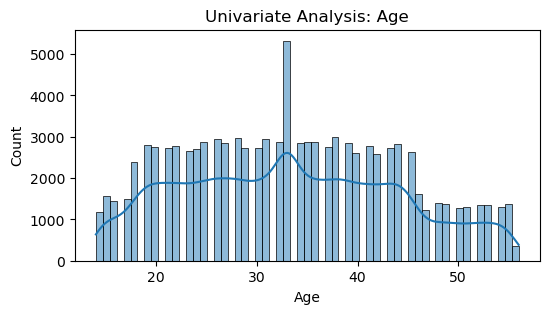

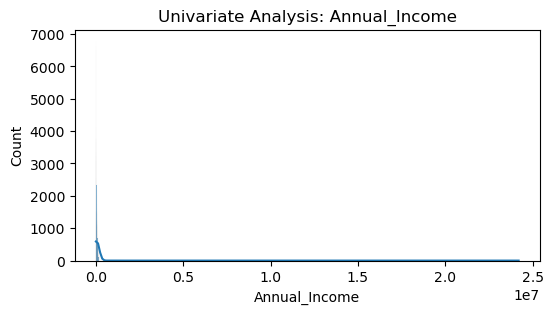

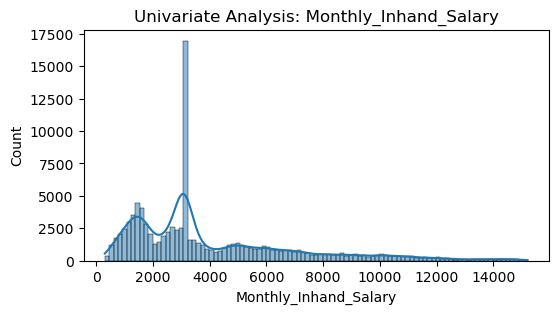

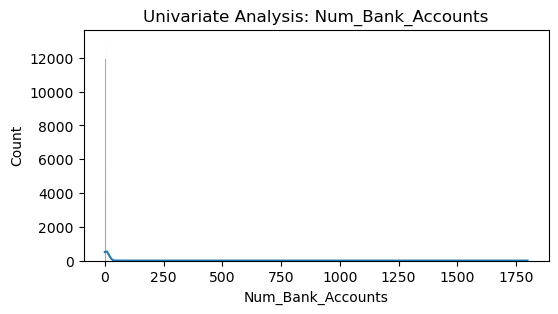

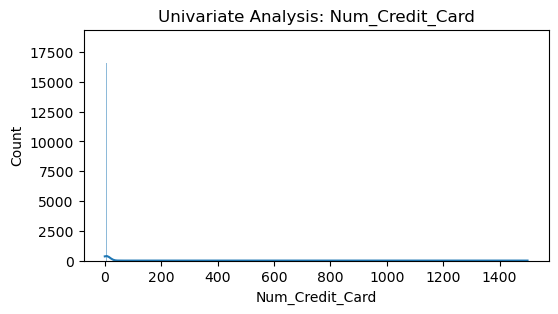

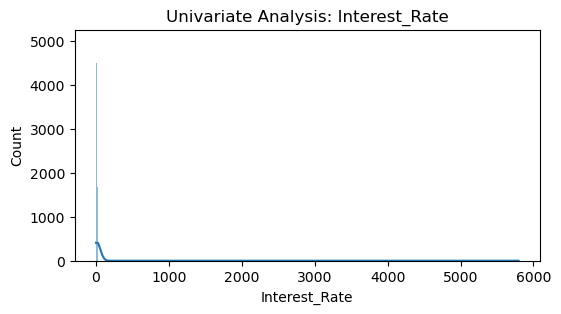

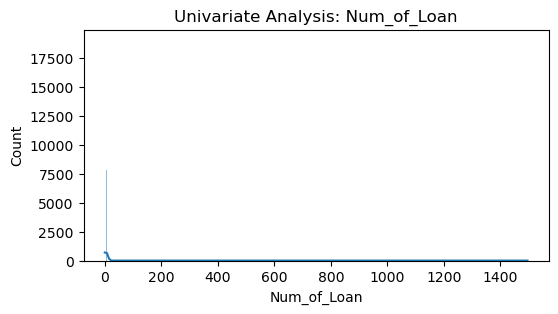

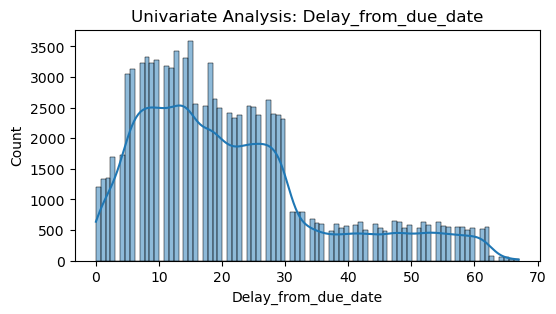

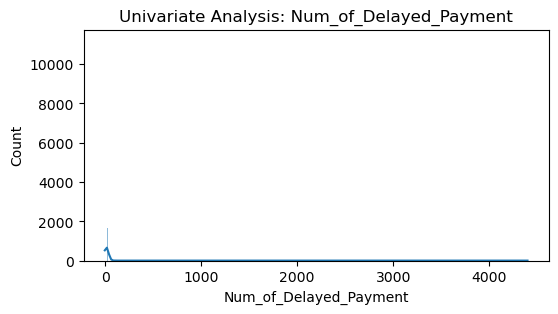

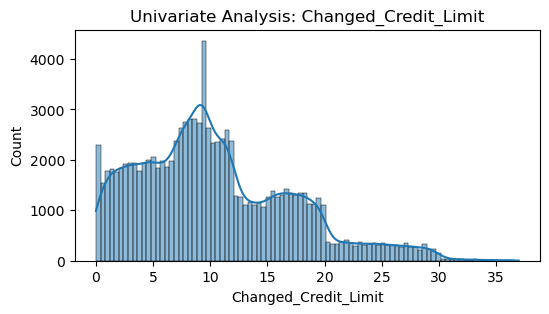

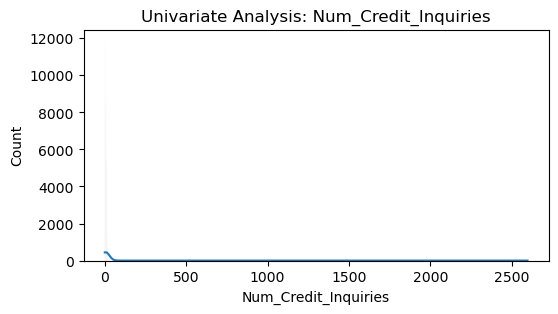

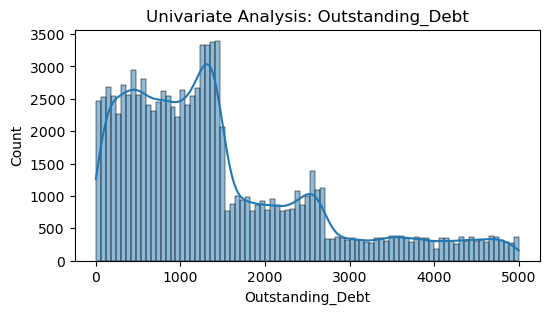

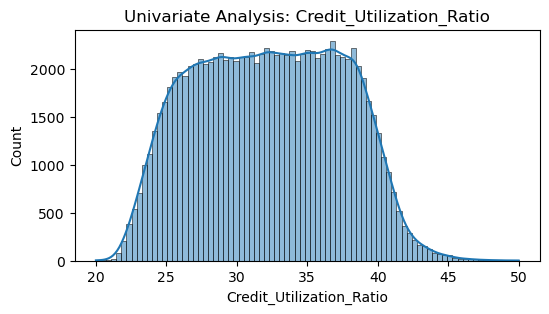

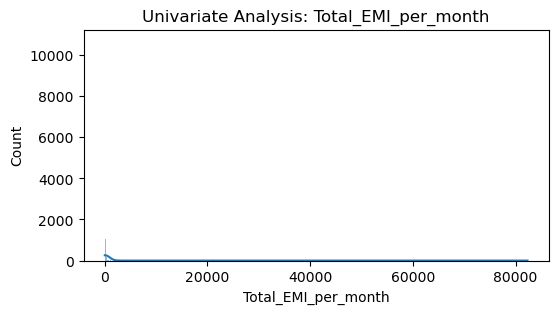

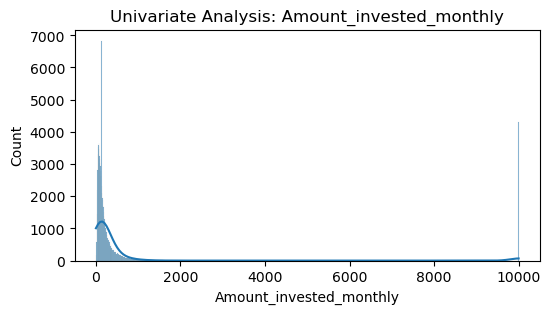

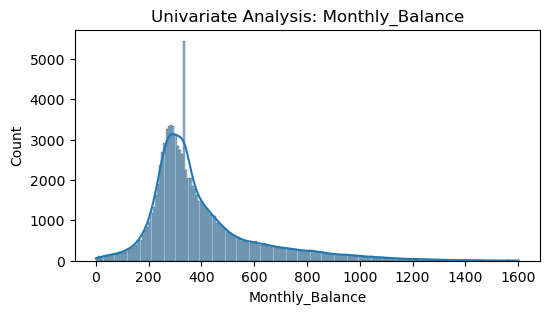

In [74]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=train_df, x=col, kde=True)
    plt.title(f'Univariate Analysis: {col}')
    plt.show()

# Bivariate Analysis

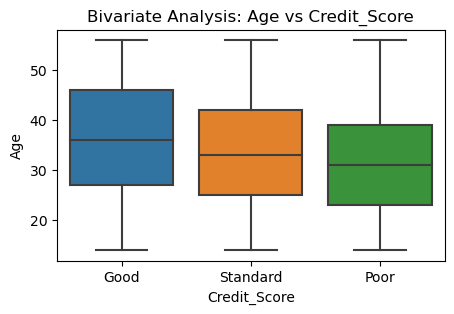

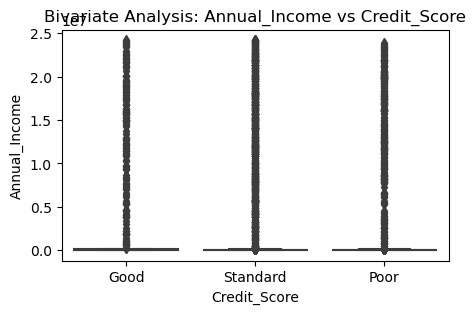

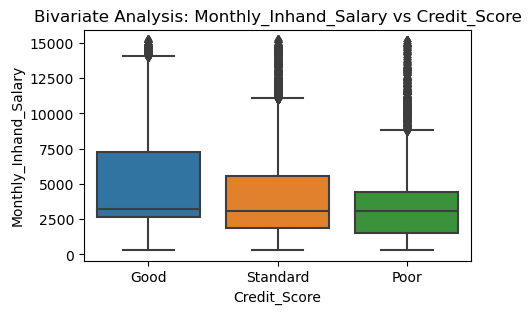

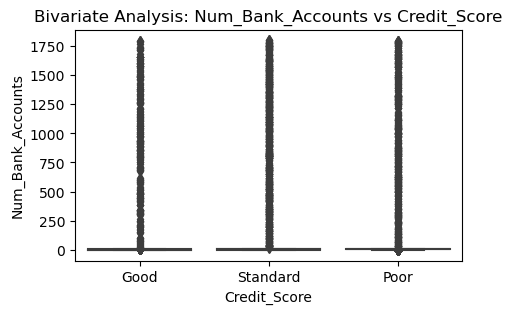

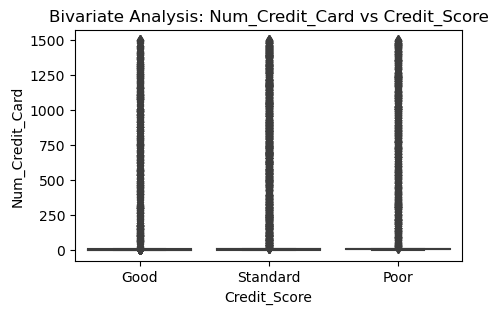

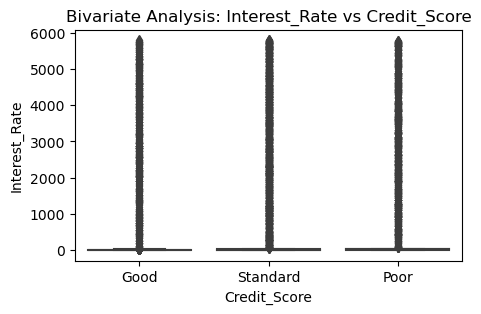

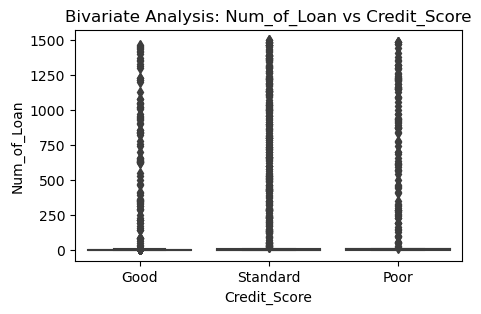

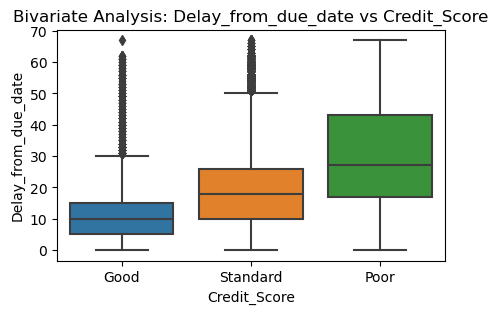

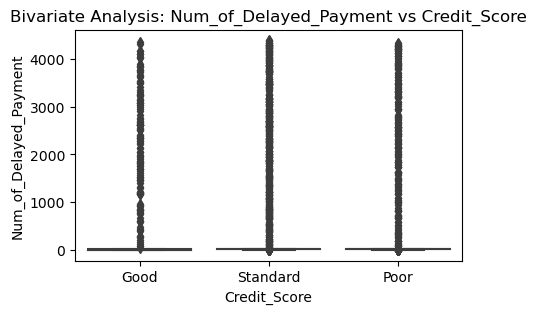

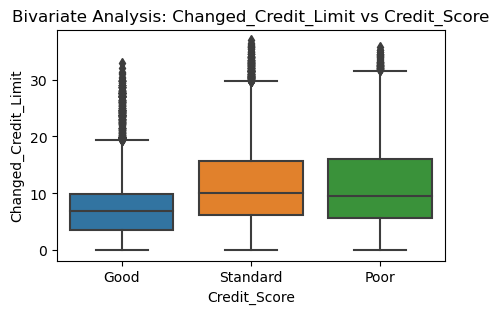

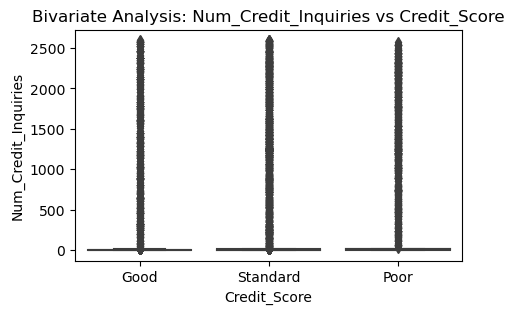

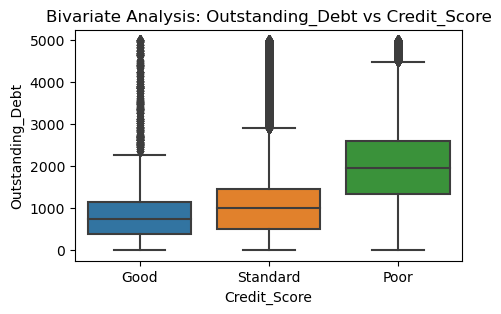

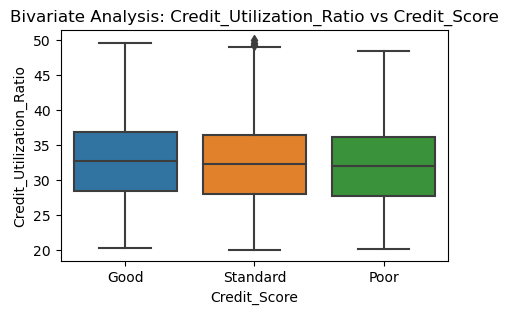

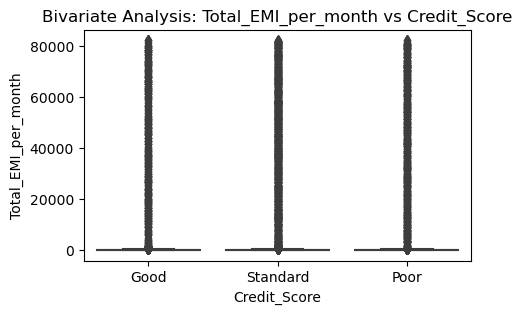

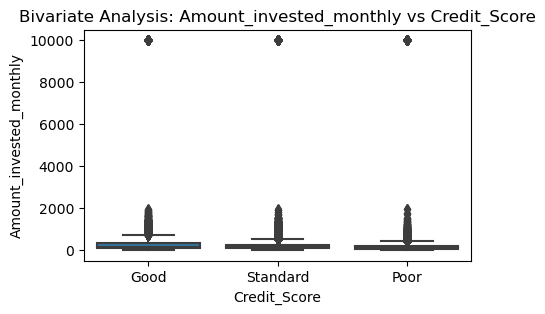

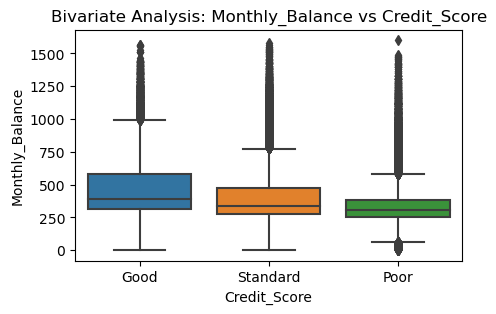

In [62]:
# numerical columns
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=train_df, x=target_variable, y=col)
    plt.title(f'Bivariate Analysis: {col} vs {target_variable}')
    plt.show()



In [59]:
categorical_col=train_df.select_dtypes('object').columns
categorical_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

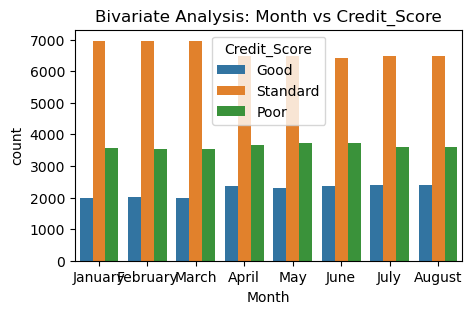

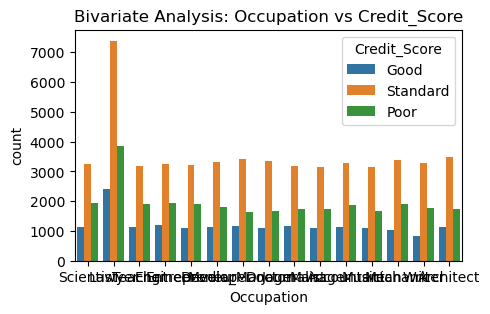

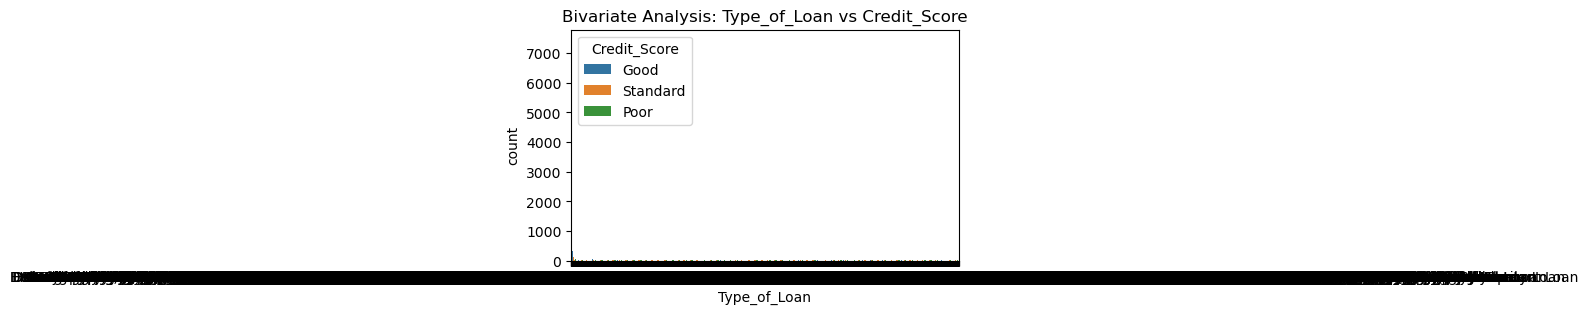

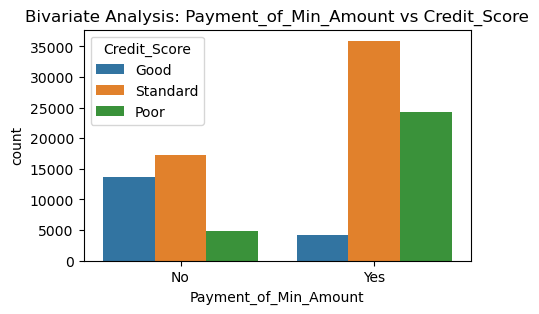

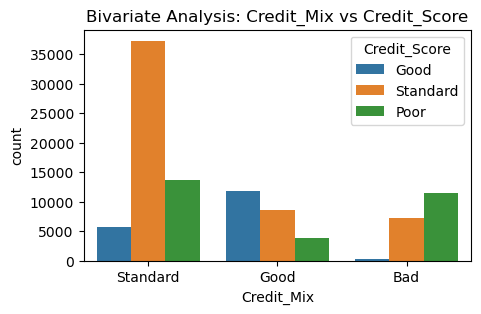

In [65]:
categorical_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Credit_Mix']

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=train_df, x=col, hue=target_variable)
    plt.title(f'Bivariate Analysis: {col} vs {target_variable}')
    plt.show()

# Multivariate Analysis

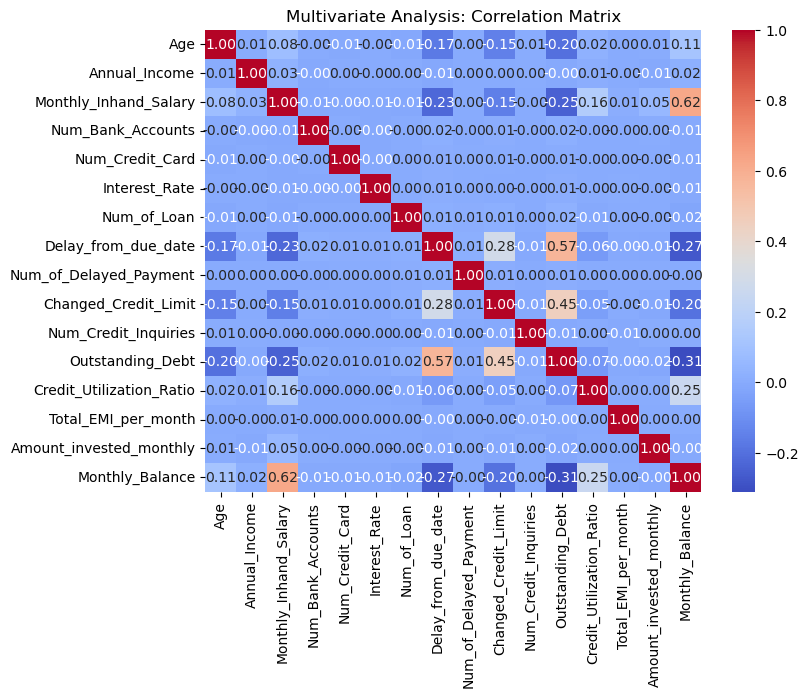

In [66]:
# Correlation matrix for numerical variables
correlation_matrix = train_df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Matrix')
plt.show()

# Step 8: Perform the Statistical analysis to prove where the independent variables have an effect on the Target variables

8.1:Check whether the Annual income across all the target variables is significantly the 
same. Let's fix the alpha is 0.05. Make sure the data is normal and the variance is 
equal. If not use a Non-parametric statistical test

In [60]:
feature = 'Annual_Income'
alpha = 0.05

# Checking for normality and equal variance
normality_test = train_df.groupby(target_variable)[feature].apply(lambda x: x.kurtosis())
equal_variance = train_df.groupby(target_variable)[feature].apply(lambda x: x.var())

if (normality_test < 3).all() and (equal_variance.mean() > 0.05):     #?
    # Data is normal and variance is equal, using one-way ANOVA
    print("Data is normal and variance is equal, using one-way ANOVA")
    anova_result = f_oneway(*[train_df[feature][train_df[target_variable] == t] for t in train_df[target_variable].unique()])
    if anova_result.pvalue < alpha:
        print("The Annual Income has a significant effect on the Target variable (Credit Score ).")
    else:
        print("The Annual Income does not have a significant effect on the Target variable.")
else:
    # Data is not normal or variance is not equal, using Kruskal-Wallis H test
    print("Data is not normal or variance is not equal, using Kruskal-Wallis H test")
    kruskal_result = kruskal(*[train_df[feature][train_df[target_variable] == t] for t in train_df[target_variable].unique()])
    if kruskal_result.pvalue < alpha:
        print("The Annual Income has a significant effect on the Target variable (Credit Score).")
    else:
        print("The Annual Income does not have a significant effect on the Target variable.")


Data is not normal or variance is not equal, using Kruskal-Wallis H test
The Annual Income has a significant effect on the Target variable (Credit Score).


8.2 :Check if there is an independence of the Occupation and Credit Score. The significant 
level is 0.05

In [61]:
categorical_feature = 'Occupation'
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(train_df[categorical_feature], train_df[target_variable])

# Perform the chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Check if there is a significant relationship
if p_value < alpha:
    print("There is a significant relationship between Occupation and Credit Score (CREDIT_SCORE).")
else:
    print("There is no significant relationship between Occupation and Credit Score.")


There is a significant relationship between Occupation and Credit Score (CREDIT_SCORE).


8.3 :Check if there is a relationship between the Payment Behaviour and Credit Score.


In [62]:
categorical_feature = 'Payment_Behaviour'
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(train_df[categorical_feature], train_df[target_variable])

# Perform the chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Check if there is a significant relationship
if p_value < alpha:
    print("There is a significant relationship between Payment Behaviour and Credit Score (CREDIT_SCORE).")
else:
    print("There is no significant relationship between Payment Behaviour and Credit Score.")


There is a significant relationship between Payment Behaviour and Credit Score (CREDIT_SCORE).


8.4 :Check Statistically that the Credit_Utilization_Ratio median values are significantly 
not different across the target variable classes.

In [63]:
numerical_feature = 'Credit_Utilization_Ratio'
alpha = 0.05

# Perform the Kruskal-Wallis H test
kruskal_result = kruskal(*[train_df[numerical_feature][train_df[target_variable] == t] for t in train_df[target_variable].unique()])

# Check if the median values are significantly different
if kruskal_result.pvalue < alpha:
    print("The median values of Credit Utilization Ratio are significantly different across the target variable classes (CREDIT_SCORE).")
else:
    print("The median values of Credit Utilization Ratio are not significantly different across the target variable classes.")


The median values of Credit Utilization Ratio are significantly different across the target variable classes (CREDIT_SCORE).


# STEP 9: Encode the categorical variables with related technologies. Change the target variable classes as (poor to 0, Standard to 1, Good to 2).

In [64]:
# copying the dataset
train_data=train_df

In [65]:
# checking values
train_data['Credit_Score'].values

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [66]:
train_data.shape

(100000, 28)

In [67]:
categorical_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [68]:
# dropping columns of no use
train_data = train_data.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'])


In [69]:
import category_encoders as ce


#### SPLITING  DATA

In [98]:
train_data=train_data.to_csv(r'F:\greatlearning\slr+slc\train_data.csv')

In [70]:
X = train_data.drop('Credit_Score', axis=1)
y = train_data['Credit_Score']

In [71]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
y = y.map(target_mapping)
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

In [72]:
# Assuming 'categorical_columns' contains the list of categorical column names
encoder = ce.cat_boost.CatBoostEncoder()

categorical_columns=['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour','Credit_History_Age']

X[categorical_columns] = encoder.fit_transform(X[categorical_columns], y)


In [73]:
X.shape

(100000, 22)

We have successfully encode and mapped the required values

# STEP 10: Scale the numerical features 

In [74]:
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [76]:
X.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.214286,0.888300,0.000501,0.102087,0.001669,0.002668,0.000345,0.002674,0.888300,0.044776,0.002273,0.304842,0.00154,0.888300,0.16202,0.227421,0.8883,0.888300,0.000602,0.008042,0.8883,0.195056
1,0.214286,1.444150,0.000501,0.187243,0.001669,0.002668,0.000345,0.002674,1.444150,0.268657,0.003864,0.304842,0.00154,0.888300,0.16202,0.398165,0.8883,1.444150,0.000602,0.011828,0.8883,0.177663
2,0.452381,1.629433,0.000501,0.187243,0.001669,0.002668,0.000345,0.002674,1.629433,0.044776,0.002273,0.000000,0.00154,1.444150,0.16202,0.286978,0.8883,1.629433,0.000602,0.008170,0.8883,0.206739
3,0.214286,1.722075,0.000501,0.187243,0.001669,0.002668,0.000345,0.002674,1.722075,0.074627,0.001591,0.169597,0.00154,1.629433,0.16202,0.379262,0.8883,1.722075,0.000602,0.019946,0.8883,0.139475
4,0.214286,1.777660,0.000501,0.102087,0.001669,0.002668,0.000345,0.002674,1.777660,0.089552,0.003864,0.304842,0.00154,1.722075,0.16202,0.159912,0.8883,1.777660,0.000602,0.004142,0.8883,0.213155


In [97]:
y

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        1
8        1
9        2
10       1
11       2
12       2
13       2
14       2
        ..
99985    0
99986    0
99987    1
99988    1
99989    1
99990    1
99991    1
99992    0
99993    1
99994    0
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

# STEP 11: Use a train test split on the dataset called a train

In [77]:
#new

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("Train set shape - X:", X_train.shape, "y:", y_train.shape)
print("Test set shape - X:", X_test.shape, "y:", y_test.shape)


Train set shape - X: (80000, 22) y: (80000,)
Test set shape - X: (20000, 22) y: (20000,)


# STEP 12: Build the base model. Observe how the model is performing

In [78]:
# Build the Logistic Regression model
model = LogisticRegression(max_iter=2000,random_state=123)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy according to logistic regression:", accuracy)
print("Classification Report (LogisticRegresiion):\n", classification_report_output)
print("Confusion Matrix (LogisticRegresiion):\n", conf_matrix)

Accuracy according to logistic regression: 0.67735
Classification Report (LogisticRegresiion):
               precision    recall  f1-score   support

           0       0.74      0.59      0.66      5874
           1       0.68      0.79      0.73     10599
           2       0.56      0.49      0.52      3527

    accuracy                           0.68     20000
   macro avg       0.66      0.62      0.64     20000
weighted avg       0.68      0.68      0.67     20000

Confusion Matrix (LogisticRegresiion):
 [[3491 2124  259]
 [1180 8343 1076]
 [  47 1767 1713]]


# STEP 13: Build other models and choose the model which gives the best results.

## RandomForestClassifier

In [79]:
# Build the base Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=123)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

#output
print("Accuracy according to RandomForest:", accuracy)
print("Classification Report (RandomForest):\n", classification_report_rf)
print("Confusion Matrix (RandomForest):\n", conf_matrix_rf)

Accuracy according to RandomForest: 0.67735
Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5874
           1       0.82      0.80      0.81     10599
           2       0.75      0.72      0.73      3527

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000

Confusion Matrix (RandomForest):
 [[4833  954   87]
 [1319 8508  772]
 [  21  960 2546]]


## DecisionTreeClassifier

In [80]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=123)


# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt= accuracy_score(y_test, y_pred)
classification_report_dt = classification_report(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)

#output
print("Accuracy according to DecisionTree:", accuracy_dt)
print("Classification Report (DecisionTree):\n", classification_report_dt)
print("Confusion Matrix (DecisionTree):\n", conf_matrix_dt)

Accuracy according to DecisionTree: 0.70585
Classification Report (DecisionTree):
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      5874
           1       0.74      0.74      0.74     10599
           2       0.62      0.61      0.61      3527

    accuracy                           0.71     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.71      0.71      0.71     20000

Confusion Matrix (DecisionTree):
 [[4092 1613  169]
 [1574 7888 1137]
 [ 182 1208 2137]]


## KNeighborsClassifier

In [81]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
classification_rep_knn = classification_report(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)

#output
print("Accuracy according to KNeighborsClassifier:", accuracy_knn)
print("Classification Report (KNeighborsClassifier):\n", classification_rep_knn)
print("Confusion Matrix (KNeighborsClassifier):\n", conf_matrix_knn)

Accuracy according to DecisionTree: 0.6941
Classification Report (DecisionTree):
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      5874
           1       0.72      0.77      0.74     10599
           2       0.58      0.46      0.52      3527

    accuracy                           0.69     20000
   macro avg       0.67      0.64      0.65     20000
weighted avg       0.69      0.69      0.69     20000

Confusion Matrix (DecisionTree):
 [[4097 1563  214]
 [1490 8154  955]
 [ 223 1673 1631]]


## GradientBoostingClassifier

In [82]:
# Initialize the classifiers
gradient_boosting = GradientBoostingClassifier(random_state=123)

#train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the test data
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred)
classification_rep_gb = classification_report(y_test, y_pred)
conf_matrix_gb = confusion_matrix(y_test, y_pred)

#output
print("Accuracy according to GradientBoostingClassifier:", accuracy_gb)
print("Classification Report (GradientBoostingClassifier):\n", classification_rep_gb)
print("Confusion Matrix (GradientBoostingClassifier):\n", conf_matrix_gb)


Accuracy according to GradientBoostingClassifier: 0.74615
Classification Report (GradientBoostingClassifier):
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      5874
           1       0.77      0.78      0.77     10599
           2       0.64      0.61      0.63      3527

    accuracy                           0.75     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.75      0.75      0.75     20000

Confusion Matrix (GradientBoostingClassifier):
 [[4495 1174  205]
 [1339 8259 1001]
 [  26 1332 2169]]


#### The GradientBoostingClassifier gives the best result among the models you've tested. It has the highest accuracy of 0.74615.

# STEP 14: Perform Feature selection using different feature selection methods.


Recursive Feature Elimination (RFE)

In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the base model (Logistic Regression)
base_model = LogisticRegression(max_iter=2000,random_state=42)

# Initialize RFE with the base model and the number of features to select
num_features_to_select = 10  # You can adjust this number based on your dataset size and complexity
rfe_selector = RFE(base_model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe_selector.support_]

# Use the selected features for model training and evaluation
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
print('X_train_rfe',X_train_rfe)
print('X_test_rfe',X_test_rfe)

X_train_rfe        Monthly_Inhand_Salary  Type_of_Loan  ...  Payment_Behaviour  Monthly_Balance
75220               0.552466      1.033233  ...           0.941573         0.534702
48955               0.629572      1.472075  ...           1.013209         0.429716
44966               0.125483      1.592553  ...           0.794309         0.151628
13568               0.104235      0.888300  ...           0.877373         0.182316
92727               0.110080      1.166561  ...           0.946574         0.225359
51349               0.152429      0.981383  ...           0.795945         0.230386
86979               0.044119      0.972075  ...           0.794205         0.200078
3806                0.083690      1.220449  ...           0.933168         0.232721
91822               0.168845      0.992553  ...           0.913312         0.204649
6006                0.078993      0.766367  ...           0.816239         0.209790
55086               0.055656      0.269757  ...           0.9187

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Sort the features based on their importance scores
sorted_idx = feature_importances.argsort()[::-1]

# Select the top K features based on importance scores
num_features_to_select = 10  # You can adjust this number based on your dataset and desired feature set
selected_features_rf = X_train.columns[sorted_idx][:num_features_to_select]

# Use the selected features for model training and evaluation
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

print('X_train_rf',X_train_rf)
print('X_test_rf',X_test_rf)

X_train_rf        Type_of_Loan  Outstanding_Debt  Credit_Mix  ...  Changed_Credit_Limit  Occupation  Num_Credit_Card
75220      1.033233          0.212258    1.324374  ...              0.134433    0.917491         0.002001
48955      1.472075          0.144596    1.321443  ...              0.168786    0.861230         0.000667
44966      1.592553          0.090927    0.853162  ...              0.050041    0.843221         0.004670
13568      0.888300          0.033482    0.855060  ...              0.304030    0.862532         0.004670
92727      1.166561          0.146297    1.328243  ...              0.268867    0.914497         0.002001
51349      0.981383          0.022110    0.854584  ...              0.507438    0.923936         0.002668
86979      0.972075          0.787866    0.413470  ...              0.440357    0.897790         0.004670
3806       1.220449          0.095617    0.866243  ...              0.096294    0.868311         0.002001
91822      0.992553          0.1881

# STEP 15 :Tune the final model using Grid search CV or Randomized CV or any other methods.

#### Let's use GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [94]:
params=({'n_estimators': [25, 50, 75],       # Number of boosting stages to be run
        'learning_rate': [0.1],   # Step size shrinkage used in updating weights
        'max_depth': [3, 5, 7] 
        })

gridd_gbm=GridSearchCV(estimator=gradient_boosting,param_grid=params,cv=5)


In [100]:
gridd_gbm.fit(X_train,y_train)
print(gridd_gbm.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 75}


In [101]:
gradient_boosting=GradientBoostingClassifier(n_estimators=75,
                              learning_rate=0.1,max_depth=7
                              )

In [102]:
gradient_boosting.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=75)

In [103]:
# Predict on the test data
y_predd = gradient_boosting.predict(X_test)

# Evaluate the model's performance
accuracy_gbb = accuracy_score(y_test, y_pred)


#output
print("Accuracy according to GradientBoostingClassifier after GridSearchzCV:", accuracy_gbb)



Accuracy according to GradientBoostingClassifier after GridSearchzCV: 0.74615


In [104]:
classification_rep_gbb = classification_report(y_test, y_pred)
conf_matrix_gbb = confusion_matrix(y_test, y_pred)
print("Classification Report (GradientBoostingClassifier):\n", classification_rep_gbb)
print("Confusion Matrix (GradientBoostingClassifier):\n", conf_matrix_gbb)

Classification Report (GradientBoostingClassifier):
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      5874
           1       0.77      0.78      0.77     10599
           2       0.64      0.61      0.63      3527

    accuracy                           0.75     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.75      0.75      0.75     20000

Confusion Matrix (GradientBoostingClassifier):
 [[4495 1174  205]
 [1339 8259 1001]
 [  26 1332 2169]]


# STEP 16:Perform Cross-validation for the final model by setting the best parameters

In [106]:
from sklearn.model_selection import cross_val_score

# Perform K-fold cross-validation
k_folds = 5  # You can adjust the number of folds based on your preference
cv_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=k_folds, scoring='accuracy', n_jobs=-1)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean_score = cv_scores.mean()
cv_std_score = cv_scores.std()

print("Mean Cross-Validation Score:", cv_mean_score)
print("Standard Deviation of Cross-Validation Scores:", cv_std_score)


Cross-Validation Scores: [0.7713125 0.773625  0.7690625 0.7720625 0.7705   ]
Mean Cross-Validation Score: 0.7713125
Standard Deviation of Cross-Validation Scores: 0.0015253073460781699


# STEP 17: Use the validation data set called test dataset to get predict the target variables once it is done create a data frame with ID and predicted values.

In [107]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [122]:
test_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [113]:
ids=test_df.drop(columns=['ID'])

In [112]:
sample=pd.read_csv(r"F:\greatlearning\slr+slc\Project 4\Sample_Output.csv")
sample.head()

,Unnamed: 0,ID,Predicted_values
0,0,0x160a,2
1,1,0x160b,2
2,2,0x160c,2
3,3,0x160d,2
4,4,0x1616,2


In [119]:
y_pred_test = gradient_boosting.predict(test_df)

# Create a DataFrame with ID and predicted values
result_df = pd.DataFrame({'ID': test_df['ID'], 'Predicted_Credit_Score': y_pred_test})

In [118]:
result_df.head()

,Unnamed: 0,ID,Predicted_values
0,0,0x160a,2
1,1,0x160b,2
2,2,0x160c,2
3,3,0x160d,2
4,4,0x1616,2


# STEP 18:Overall business insight. 

# STEP 19:Save the dataset

In [120]:
result_df=result_df.to_csv(r'F:\greatlearning\slr+slc\result_df.csv')